In [149]:
%matplotlib inline
import os
import flow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
from IPython.display import clear_output
import pandas as pd

In [167]:
# Load your triggered traces and corresponding metadata 
mouse = 'OA27'
trace_type = 'dff'
runs = flow.metadata.RunSorter.frommeta(mice=[mouse])
meta_path = os.path.join(flow.paths.outd, mouse + '_df_' + trace_type + '_trialmeta.pkl')
trig_path = os.path.join(flow.paths.outd, str(runs[0].mouse) + '_' + str(runs[0].date) + '_df_' + trace_type + '.pkl')
df_m = pd.read_pickle(meta_path)
df_t = pd.read_pickle(trig_path)

In [163]:
# merge your dataframes on trial_idx
# print(df_m.head())
df_t = df_t.reset_index(level=['cell_idx', 'timestamp'])

In [164]:
# merge your dataframes on trial_idx
df = pd.merge(df_t, df_m, on=['mouse', 'date', 'run', 'trial_idx'], how='left')

In [154]:
# filter your merged df to only include the trial types you want to be dealing with
df1 = df.loc[((df.orientation == 0) | (df.orientation == 135)
            | (df.orientation == 270)) & (df.tag == 'standard') & (df.cell_idx == 1),:]

In [168]:
# remove nan trials 
# df1 = df1.loc[np.isfinite(df1.trace),:]
# print(np.sum(np.isnan(df1['trace'])))
df_m

condition  ensure  firstlick  hunger  \
mouse date   run trial_idx                                               
OA27  170116 2   0          orientation_225     NaN        NaN  hungry   
                 1          orientation_135     NaN        NaN  hungry   
                 2           orientation_90     NaN        NaN  hungry   
                 3          orientation_135     NaN        NaN  hungry   
                 4          orientation_315     NaN        NaN  hungry   
                 5          orientation_180     NaN        NaN  hungry   
                 6          orientation_270     NaN        NaN  hungry   
                 7           orientation_90     NaN        NaN  hungry   
                 8           orientation_90     NaN        NaN  hungry   
                 9          orientation_180     NaN        NaN  hungry   
                 10          orientation_45     NaN        NaN  hungry   
                 11         orientation_315     NaN        NaN  hungry   
                 12          orientation_90     NaN        NaN  hungry   
                 13          orientation_45     NaN        NaN  hungry   
                 14         orientation_270     NaN        NaN  hungry   
                 15         orientation_225     NaN        NaN  hungry   
                 16         orientation_225     NaN        NaN  hungry   
                 17          orientation_90     NaN        NaN  hungry   
                 18          orientation_45     NaN        NaN  hungry   
                 19         orientation_270     NaN        NaN  hungry   
                 20          orientation_90     NaN        NaN  hungry   
                 21         orientation_135     NaN        NaN  hungry   
                 22         orientation_225     NaN        NaN  hungry   
                 23         orientation_135     NaN        NaN  hungry   
                 24         orientation_315     NaN        NaN  hungry   
                 25          orientation_90     NaN        NaN  hungry   
                 26         orientation_180     NaN        NaN  hungry   
                 27         orientation_180     NaN        NaN  hungry   
                 28         orientation_270     NaN        NaN  hungry   
                 29          orientation_90     NaN        NaN  hungry   
...                                     ...     ...        ...     ...   
      170404 7   111                neutral     NaN        NaN  hungry   
                 112                neutral     NaN        NaN  hungry   
                 113                   plus     NaN        NaN  hungry   
                 114                neutral     NaN        NaN  hungry   
                 115                  minus     NaN        NaN  hungry   
                 116                   plus     NaN        NaN  hungry   
                 117                   plus     NaN        NaN  hungry   
                 118                  minus     NaN        NaN  hungry   
                 119                   plus     NaN        NaN  hungry   
                 120                   plus     NaN        NaN  hungry   
                 121                   plus     NaN        NaN  hungry   
                 122                neutral   160.0        NaN  hungry   
                 123                   plus     NaN        NaN  hungry   
                 124                  minus     NaN        NaN  hungry   
                 125                  minus     NaN        NaN  hungry   
                 126                  minus     NaN        NaN  hungry   
                 127                neutral     NaN        NaN  hungry   
                 128                neutral     NaN        NaN  hungry   
                 129                neutral   160.0        NaN  hungry   
                 130                   plus     NaN        NaN  hungry   
                 131                  minus     NaN        NaN  hungry   
                 132                  

In [155]:
run_line = False
day_line = False
cs_bar = True

# arthur's predetermined hex colors 
colors = {
    'orange': '#E86E0A',
    'red': '#D61E21',
    'gray': '#7C7C7C',
    'black': '#000000',
    'green': '#75D977',
    'mint': '#47D1A8',
    'purple': '#C880D1',
    'indigo': '#5E5AE6',
    'blue': '#47AEED', # previously 4087DD
    'yellow': '#F2E205',
}

# cs to color mapping 
cs_colors = {
    'plus': 'green',
    'minus': 'red',
    'neutral': 'blue',
}

# red=high, white=middle, blue=low colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# add offset, ensure, and first-lick

# get timestamp info for plotting lines
times = df1['timestamp']
zero_sec = np.where(np.unique(times) == 0)[0]
three_sec = np.where(np.unique(times) == 3)[0]

# oris
oris = [0, 135, 270]

# plot  main figure
toplot = df1.pivot_table(index=['date', 'run','trial_idx','orientation'] , columns='timestamp', values='trace')
g = sns.FacetGrid(toplot.reset_index('orientation'), col='orientation', height=6, sharey=False, )
g.map_dataframe(myheatmap, vmax=1, vmin=-1, center=0, xticklabels=31, cmap=cmap)  

# loop through axes and plot relevant metadata on top
count = 0
for ax in g.axes[0]:
    
    # get metadata for this orientation/set of trials 
    meta = df1.loc[df1['orientation'] == oris[count], ['condition']]
    meta = meta.reset_index()
    meta = meta.drop_duplicates()
    days = meta['date']
    runs = meta['run']
    css = meta['condition']
#     run_type = meta['run_type']

    print(ax.get_ylabel())
    print(ax.get_yticklabels())
    print(ax.get_yticks())
    yticklabels = [s for s in ax.get_yticklabels()]
    yticks = [s for s in ax.get_yticks()]
    print(yticklabels)
    
    # set labels
    if count == 0:
        ax.set_ylabel('Trial')
    if count == 1:  
        ax.set_xlabel('Time (sec)')
        
    # plot onset/offest lines
    y_lim = ax.get_ylim()
    x_lim = ax.get_xlim()
    ax.plot((zero_sec, zero_sec), y_lim, color='#8e8e8e', ls='-', lw=2.5)
    ax.plot((three_sec, three_sec), y_lim, color='#bababa', ls='-', lw=2.5)

    # plot cs color line
    if cs_bar:
        for cs in np.unique(css):
            cs_line_color = colors[cs_colors[cs]]
            cs_y = np.where(css == cs)[0]
            cs_y = [cs_y[0], cs_y[-1]+1]
            ax.plot((4, 4), cs_y, color=cs_line_color, ls='-', lw=10, alpha=0.7)
    
    # plot lines between days
    if day_line:
        for day in np.unique(days):
            day_y = np.where(css == cs)[0]
            day_y = [day_y[0], day_y[-1]]
            ax.plot(x_lim, day_y, color='#bababa', ls='-', lw=2.5)
        
    # plot lines between runs
    if run_line:
        for run in np.unique(runs):
            run_y = np.where(css == cs)[0]
            run_y = [day_y[0], cs_y[-1]]
            ax.plot(x_lim, run_y, color='#bababa', ls='-', lw=2.5)
    
    count = count + 1


<Figure size 0x432 with 0 Axes>

In [11]:
def myheatmap(data, **kwargs):
    
#     print(data.head())
    mydata = data.set_index('orientation', append=True)
    sns.heatmap(mydata, **kwargs)

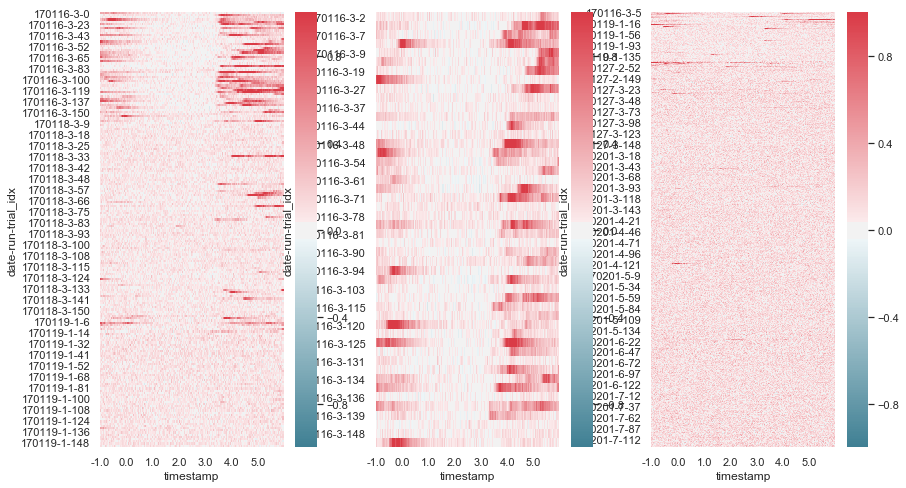

In [136]:
fig, ax = plt.subplots(1,3,figsize=(14,8))

# plotting parameters 
center = 0
vmin = -1
vmax = 1
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# slice datasets into orientations 0, 135, 270
df0 = df1.loc[(df1.orientation == 0),:]
df0 = df0.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')
df135 = df1.loc[(df1.orientation == 135),:]
df135 = df135.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')
df270 = df1.loc[(df1.orientation == 270),:]
df270 = df270.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')

# to plot with nans there is probably some pandas rehspe of the dataframe that will fill in 
# non overlapping values with nans

# plot heatmaps 
sns.heatmap(df0, xticklabels=31, ax=ax[0], vmax=vmax, vmin=vmin, center=center, cmap=cmap)
sns.heatmap(df135, xticklabels=31, ax=ax[1], vmax=vmax, vmin=vmin, center=center, cmap=cmap)
sns.heatmap(df270, xticklabels=31, ax=ax[2], vmax=vmax, vmin=vmin, center=center, cmap=cmap)